# Bank Churn Model Development

# Steps

1. Identify columns to use as predictors

2. Feature Engineering

3. GridSearch and Model Tuning

4. Model validation

5. Conclusions

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
#plt.style.use('')


from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.utils import resample

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
y = data.pop('Exited')

In [4]:
data['Gender_Geography'] = data['Gender'] + "_" + data['Geography'] # interaction effect

In [5]:
#data['Gender_Geography'] = data['Gender'] + "_" + data['Geography']

In [6]:
interesting_columns = ['CreditScore', 'Geography', 'Gender',
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Geography']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[interesting_columns], y, test_size=0.25, random_state=894)

In [8]:
y_train.mean(), y_test.mean()

(0.21210260553423552, 0.21008749606146537)

In [9]:
y_train.shape, y_train.value_counts()

((123775,),
 Exited
 0    97522
 1    26253
 Name: count, dtype: int64)

In [10]:
X_upsampled, y_upsampled = resample(X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples=20000)

In [11]:
X_train = pd.concat([X_train, X_upsampled])
y_train = pd.concat([y_train, y_upsampled])

In [12]:
y_train.value_counts()

Exited
0    97522
1    46253
Name: count, dtype: int64

In [13]:
X_train.shape, y_train.shape

((143775, 11), (143775,))

In [14]:
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'Gender_Geography'] # ignore  ['HasCrCard', 'IsActiveMember'] --> passthrough :)
X_train[categorical_columns]

,Geography,Gender,NumOfProducts,Gender_Geography
154520,France,Male,1,Male_France
9159,France,Female,2,Female_France
143955,France,Female,1,Female_France
57966,Spain,Male,1,Male_Spain
160713,France,Male,2,Male_France
...,...,...,...,...
93305,Spain,Female,1,Female_Spain
42234,France,Female,2,Female_France
120,France,Female,1,Female_France
24343,France,Female,1,Female_France


In [15]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X_train[numerical_columns]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
154520,696,41.0,2,156067.05,8983.88
9159,602,52.0,1,0.00,65413.38
143955,550,40.0,8,150490.32,166468.21
57966,714,41.0,7,0.00,123699.71
160713,556,71.0,9,0.00,152876.05
...,...,...,...,...,...
93305,573,48.0,7,0.00,80778.42
42234,683,58.0,6,0.00,107841.86
120,758,46.0,2,0.00,173486.39
24343,637,35.0,2,0.00,23598.23


In [16]:
from sklearn.preprocessing import  PolynomialFeatures

In [17]:
# transfomrer for numerical data
numeric_transformer = Pipeline(
    steps=[("scaler", RobustScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=False))]
)

In [18]:
# preprocessor = ColumnTransformer(
#                 transformers=[("categorical", OneHotEncoder(drop='if_binary'), categorical_columns), 
#                                 ("numerical", RobustScaler(), numerical_columns)],
#                 remainder="passthrough", verbose_feature_names_out=True
#             )

preprocessor = ColumnTransformer(
                transformers=[("categorical", OneHotEncoder(drop='if_binary'), categorical_columns), 
                                ("numerical", numeric_transformer, numerical_columns)],
                remainder="passthrough", verbose_feature_names_out=True, n_jobs=6
            )

In [19]:
X_train_features = preprocessor.fit_transform(X_train)

In [20]:
X_train_features = pd.DataFrame(X_train_features, columns=preprocessor.get_feature_names_out())

In [21]:
X_train_features

,categorical__Geography_France,categorical__Geography_Germany,categorical__Geography_Spain,categorical__Gender_Male,categorical__NumOfProducts_1,categorical__NumOfProducts_2,categorical__NumOfProducts_3,categorical__NumOfProducts_4,categorical__Gender_Geography_Female_France,categorical__Gender_Geography_Female_Germany,categorical__Gender_Geography_Female_Spain,categorical__Gender_Geography_Male_France,categorical__Gender_Geography_Male_Germany,categorical__Gender_Geography_Male_Spain,numerical__CreditScore,numerical__Age,numerical__Tenure,numerical__Balance,numerical__EstimatedSalary,numerical__CreditScore^2,numerical__CreditScore Age,numerical__CreditScore Tenure,numerical__CreditScore Balance,numerical__CreditScore EstimatedSalary,numerical__Age^2,numerical__Age Tenure,numerical__Age Balance,numerical__Age EstimatedSalary,numerical__Tenure^2,numerical__Tenure Balance,numerical__Tenure EstimatedSalary,numerical__Balance^2,numerical__Balance EstimatedSalary,numerical__EstimatedSalary^2,remainder__HasCrCard,remainder__IsActiveMember
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.327434,0.272727,-0.75,1.287349,-1.355750,0.107213,0.089300,-0.245575,0.421521,-0.443918,0.074380,-0.204545,0.351095,-0.369750,0.5625,-0.965511,1.016812,1.657266,-1.745323,1.838058,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.504425,1.272727,-1.00,0.000000,-0.660909,0.254444,-0.641995,0.504425,-0.000000,0.333379,1.619835,-1.272727,0.000000,-0.841157,1.0000,-0.000000,0.660909,0.000000,-0.000000,0.436801,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.964602,0.181818,0.75,1.241348,0.583422,0.930457,-0.175382,-0.723451,-1.197406,-0.562770,0.033058,0.136364,0.225700,0.106077,0.5625,0.931011,0.437567,1.540944,0.724230,0.340381,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.486726,0.272727,0.50,0.000000,0.056795,0.236902,0.132743,0.243363,0.000000,0.027644,0.074380,0.136364,0.000000,0.015490,0.2500,0.000000,0.028398,0.000000,0.000000,0.003226,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.911504,3.000000,1.00,0.000000,0.416056,0.830840,-2.734513,-0.911504,-0.000000,-0.379237,9.000000,3.000000,0.000000,1.248168,1.0000,0.000000,0.416056,0.000000,0.000000,0.173103,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143770,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.761062,0.909091,0.50,0.000000,-0.471713,0.579215,-0.691874,-0.380531,-0.000000,0.359003,0.826446,0.454545,0.000000,-0.428830,0.2500,0.000000,-0.235857,0.000000,-0.000000,0.222513,1.0,1.0
143771,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.212389,1.818182,0.25,0.000000,-0.138469,0.045109,0.386163,0.053097,0.000000,-0.029409,3.305785,0.454545,0.000000,-0.251762,0.0625,0.000000,-0.034617,0.000000,-0.000000,0.019174,1.0,0.0
143772,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.876106,0.727273,-0.75,0.000000,0.669840,0.767562,0.637168,-0.657080,0.000000,0.586851,0.528926,-0.545455,0.000000,0.487156,0.5625,-0.000000,-0.502380,0.000000,0.000000,0.448686,1.0,0.0
143773,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.194690,-0.272727,-0.75,0.000000,-1.175797,0.037904,0.053097,0.146018,-0.000000,0.228916,0.074380,0.204545,-0.000000,0.320672,0.5625,-0.000000,0.881848,0.000000,-0.000000,1.382499,1.0,0.0


In [22]:
X_test_features = preprocessor.transform(X_test)

In [23]:
X_test_features = pd.DataFrame(X_test_features, columns=preprocessor.get_feature_names_out())

In [24]:
X_test_features

,categorical__Geography_France,categorical__Geography_Germany,categorical__Geography_Spain,categorical__Gender_Male,categorical__NumOfProducts_1,categorical__NumOfProducts_2,categorical__NumOfProducts_3,categorical__NumOfProducts_4,categorical__Gender_Geography_Female_France,categorical__Gender_Geography_Female_Germany,categorical__Gender_Geography_Female_Spain,categorical__Gender_Geography_Male_France,categorical__Gender_Geography_Male_Germany,categorical__Gender_Geography_Male_Spain,numerical__CreditScore,numerical__Age,numerical__Tenure,numerical__Balance,numerical__EstimatedSalary,numerical__CreditScore^2,numerical__CreditScore Age,numerical__CreditScore Tenure,numerical__CreditScore Balance,numerical__CreditScore EstimatedSalary,numerical__Age^2,numerical__Age Tenure,numerical__Age Balance,numerical__Age EstimatedSalary,numerical__Tenure^2,numerical__Tenure Balance,numerical__Tenure EstimatedSalary,numerical__Balance^2,numerical__Balance EstimatedSalary,numerical__EstimatedSalary^2,remainder__HasCrCard,remainder__IsActiveMember
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-0.181818,0.25,0.000000,0.429698,0.000000,-0.000000,0.000000,0.000000,0.000000,0.033058,-0.045455,-0.000000,-0.078127,0.0625,0.000000,0.107425,0.000000,0.000000,0.184641,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.185841,0.454545,-0.50,1.212853,0.298334,0.034537,-0.084473,0.092920,-0.225397,-0.055443,0.206612,-0.227273,0.551297,0.135606,0.2500,-0.606427,-0.149167,1.471013,0.361835,0.089003,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.061947,1.000000,0.50,0.000000,0.441860,0.003837,0.061947,0.030973,0.000000,0.027372,1.000000,0.500000,0.000000,0.441860,0.2500,0.000000,0.220930,0.000000,0.000000,0.195240,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.876106,0.818182,-1.00,0.787941,-0.563866,0.767562,0.716814,-0.876106,0.690320,-0.494006,0.669421,-0.818182,0.644679,-0.461345,1.0000,-0.787941,0.563866,0.620851,-0.444293,0.317945,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.557522,-0.727273,1.25,0.000000,0.257151,0.310831,0.405471,-0.696903,-0.000000,-0.143367,0.528926,-0.909091,-0.000000,-0.187019,1.5625,0.000000,0.321438,0.000000,0.000000,0.066126,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.247788,-0.545455,0.50,0.000000,-0.372117,0.061399,-0.135157,0.123894,0.000000,-0.092206,0.297521,-0.272727,-0.000000,0.202973,0.2500,0.000000,-0.186058,0.000000,-0.000000,0.138471,1.0,0.0
41255,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.619469,0.090909,1.00,1.409338,0.633436,0.383742,0.056315,0.619469,0.873041,0.392394,0.008264,0.090909,0.128122,0.057585,1.0000,1.409338,0.633436,1.986234,0.892726,0.401241,1.0,1.0
41256,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.035398,-1.454545,-0.50,0.000000,-0.809087,0.001253,-0.051488,-0.017699,0.000000,-0.028640,2.115702,0.727273,-0.000000,1.176854,0.2500,-0.000000,0.404544,0.000000,-0.000000,0.654622,0.0,1.0
41257,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.300885,0.727273,-0.50,1.251403,0.759110,0.090532,0.218825,-0.150442,0.376528,0.228405,0.528926,-0.363636,0.910111,0.552080,0.2500,-0.625702,-0.379555,1.566010,0.949953,0.576249,1.0,0.0


## Dummy Classifier & Logistic Regression

As a benchmark, I will use a dummy classifier and a logistic regression model

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
dummy_model = DummyClassifier()
dummy_model.fit(X=X_train_features, y=y_train)

DummyClassifier()

In [27]:
logistic_model = LogisticRegression(penalty='l2', C=1)
logistic_model.fit(X=X_train_features, y=y_train)

LogisticRegression(C=1)

In [28]:
import lightgbm as lgb
import datetime
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = dict(n_estimators=[200, 400], 
                  colsample_bytree=[0.8], 
                  subsample=[0.8] , 
                  subsample_freq=[1],
                  learning_rate = [0.1, 0.2],
                  max_depth = [2, 3],
                  num_leaves = [2, 4, 8],
                  reg_alpha = [0.1, 0.2],
                  reg_lambda = [0.1, 0.2])

In [30]:
base_classifier  = lgb.LGBMClassifier(n_estimators = 200, colsample_bytree=0.8, subsample=0.8, subsample_freq=1, learning_rate=0.1, max_depth=2, 
                                 n_jobs=-1, force_row_wise=True, verbosity=-1, is_imbalance=True)
base_classifier.fit(X_train_features, y_train)

LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
               max_depth=2, n_estimators=200, n_jobs=-1, subsample=0.8,
               subsample_freq=1, verbosity=-1)

In [31]:
GRIDSEARCH = False

In [32]:
start= datetime.datetime.now()

if GRIDSEARCH:
    grid_search = GridSearchCV(
            estimator=base_classifier,
            param_grid=param_grid,
            return_train_score=True,
            cv=2, 
            scoring='f1', 
            n_jobs=-1, 
            verbose=0
        ).fit(X_train_features, y_train)
else:
    lgb_classifier = lgb.LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
               learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
               num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
               subsample_freq=1, verbosity=-1)
    lgb_classifier.fit(X_train_features, y_train)

end = datetime.datetime.now()

In [33]:
if GRIDSEARCH:
    print("Duration: {}".format(end-start), end, start)

In [34]:
#grid_search.best_params_
# {'colsample_bytree': 0.8,
#  'learning_rate': 0.2,
#  'max_depth': 2,
#  'n_estimators': 200,
#  'num_leaves': 4,
#  'reg_alpha': 0.2,
#  'reg_lambda': 0.1,
#  'subsample': 0.8,
#  'subsample_freq': 1}

In [35]:
if GRIDSEARCH:
    lgb_classifier = grid_search.best_estimator_
lgb_classifier

LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
               learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
               num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
               subsample_freq=1, verbosity=-1)

In [36]:
if GRIDSEARCH:
    print(grid_search.best_score_)

In [37]:
if GRIDSEARCH:
    cv_results = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending=False)
    cv_results['mean_test_score']

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [39]:
estimator = cross_validate(estimator=lgb_classifier, X=X_train_features, y=y_train, cv=StratifiedKFold(5), scoring='roc_auc', return_estimator=True)
estimator

{'fit_time': array([0.7014606 , 0.51645517, 0.70897508, 0.67081547, 2.12756443]),
 'score_time': array([0.03090286, 0.02692199, 0.05335045, 0.02746105, 0.03620744]),
 'estimator': [LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 subsample_freq=1, verbosity=-1),
  LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 subsample_freq=1, verbosity=-1),
  LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 su

Text(0.5, 1.0, 'AUC Scores Across CV')

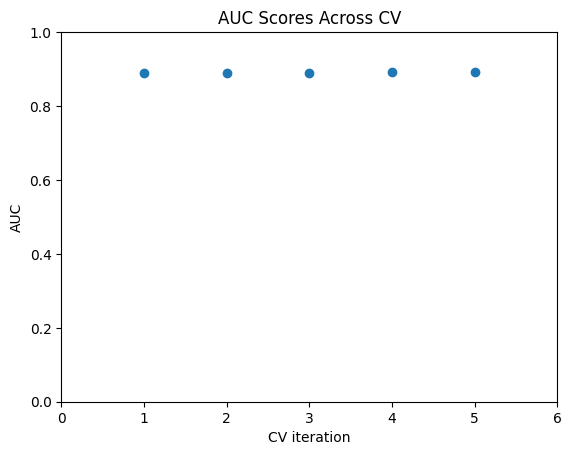

In [40]:
plt.scatter(range(1, 6), estimator['test_score'])
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.ylabel("AUC")
plt.xlabel("CV iteration")
plt.title("AUC Scores Across CV")

In [41]:
y_test_pred = lgb_classifier.predict(X_test_features)
y_test_proba = lgb_classifier.predict_proba(X_test_features)

In [42]:
#Generate predicted probabilites
print('AUC: ', roc_auc_score(y_test, y_test_proba[:,1]))
print('Accuracy: ', lgb_classifier.score(X_test_features, y_test))

AUC:  0.8840928407806126
Accuracy:  0.8564919169150973


In [43]:
logistic_proba = logistic_model.predict_proba(X_test_features)

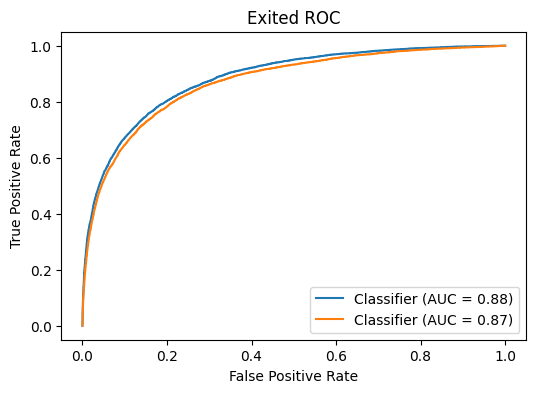

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))
display = RocCurveDisplay.from_predictions(y_test, y_test_proba[:, 1], ax=ax) 
_ = RocCurveDisplay.from_predictions(y_test, y_pred=logistic_proba[:, 1], ax=ax)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Exited ROC")
plt.legend()
plt.show()

In [45]:
cr = classification_report(y_true=y_test, y_pred=y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     32591
           1       0.66      0.65      0.65      8668

    accuracy                           0.86     41259
   macro avg       0.78      0.78      0.78     41259
weighted avg       0.86      0.86      0.86     41259



In [46]:
balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.7798926008135653

In [47]:
dummy_pred = dummy_model.predict(X_test_features)
dummy_cr = classification_report(y_true=y_test, y_pred=dummy_pred)
print(dummy_cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     32591
           1       0.00      0.00      0.00      8668

    accuracy                           0.79     41259
   macro avg       0.39      0.50      0.44     41259
weighted avg       0.62      0.79      0.70     41259



/home/jonathan/miniconda3/envs/mldev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jonathan/miniconda3/envs/mldev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jonathan/miniconda3/envs/mldev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [48]:
logistic_pred = logistic_model.predict(X_test_features)
logistic_cr = classification_report(y_true=y_test, y_pred=logistic_pred)
print(logistic_cr)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     32591
           1       0.63      0.65      0.64      8668

    accuracy                           0.84     41259
   macro avg       0.77      0.77      0.77     41259
weighted avg       0.85      0.84      0.85     41259



## Conclusion

Should the bank use or trust this model. With an accuracy of 0.86, and a precision of 0.74, and recall of 0.54, this model performs better than random chance. A dummy classifier might see that approximately 80% of customers do not Exit and hence would always predict that all accounts not Exit. This would miss all positive cases - an extreme example. The model performs better than random chance. At a minimum this captures a little over half of customers bound to exit saving business without punishing those that would not leave.

## Save Model and Pipeline

In [49]:
import joblib

with open("models/lgb_classifier.joblib", "wb+") as openfile:
    joblib.dump(lgb_classifier, openfile)

In [50]:
with open("models/data_preprocessor.joblib", "wb+") as openfile:
    joblib.dump(preprocessor, openfile)

# Predictions


In [51]:
test_data = pd.read_csv("data/test.csv")

In [52]:
test_data['Gender_Geography'] = test_data['Gender'] + '_' + test_data['Geography']

In [53]:
test_features = preprocessor.transform(test_data)

In [54]:
y_pred = lgb_classifier.predict(test_features)

In [55]:
y_pred_mat = lgb_classifier.predict_proba(test_features)
y_pred = y_pred_mat[:, 1]

In [56]:
submission = test_data[['id']]
submission['Exited'] = y_pred

/tmp/ipykernel_10670/2661433024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Exited'] = y_pred


In [57]:
submission

,id,Exited
0,165034,0.044219
1,165035,0.895780
2,165036,0.057902
3,165037,0.338207
4,165038,0.456296
...,...,...
110018,275052,0.068996
110019,275053,0.233129
110020,275054,0.031360
110021,275055,0.199507


In [58]:
submission.to_csv('data/predictions_submission.csv', index=False)